In [5]:
import numpy as np
def sim_vol(T,H,nu,fbm):
    n = len(fbm)
    dt = T/n
    log_v_square = [-3.2]
    for i in range(n-1):
        log_v_square.append(log_v_square[i]+nu*fbm[i+1]*dt**H)
    return np.sqrt(np.exp(log_v_square))

In [7]:
def sim_price(S0,T,vol):
    n = len(vol)
    dt = T/n
    prices = [S0]
    for i in range(n-1):
        prices.append(prices[i]*np.exp(vol[i+1]*np.random.randn(1)[0]*np.sqrt(dt)-0.5*vol[i+1]**2*dt))
    return prices

In [52]:
import from fbm import fgn
# parameter
S0 = 100
r = 0.01
strikes = np.arange(0.5*S0,1.5*S0,1)
T = 0.25
H = 0.1
nu = 0.3
# simulation
ST = []
i = 0
while i < 1000:
    ticks = round(8*252*T)
    fgn_sample = fgn(n=ticks, hurst=H, length=T, method='daviesharte')
    vol = sim_vol(T,H,nu,fgn_sample)
    price = sim_price(S0,T,vol)
    ST.append(price[-1])
    i += 1
calls = []
for strike in strikes:
    calls.append(np.exp(-r*T)*np.mean(np.fmax(np.array(ST)-strike*np.ones(len(ST)),0)))

In [53]:
import scipy.stats as si
def newton_vol_call(S, K, T, C, r, sigma):
    
    d1 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    fx = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) - C
    
    vega = (1 / np.sqrt(2 * np.pi)) * S * np.sqrt(T) * np.exp(-(si.norm.cdf(d1, 0.0, 1.0) ** 2) * 0.5)
    
    tolerance = 0.0001
    x0 = sigma
    xnew  = x0
    xold = x0 - 1
        
    while abs(xnew - xold) > tolerance:
    
        xold = xnew
        xnew = (xnew - fx - C) / vega
        
        return abs(xnew)

In [54]:
impl_vol = []
for i in range(len(calls)):
    impl_vol.append(newton_vol_call(S0, strikes[i], T, calls[i], r, 0.25))

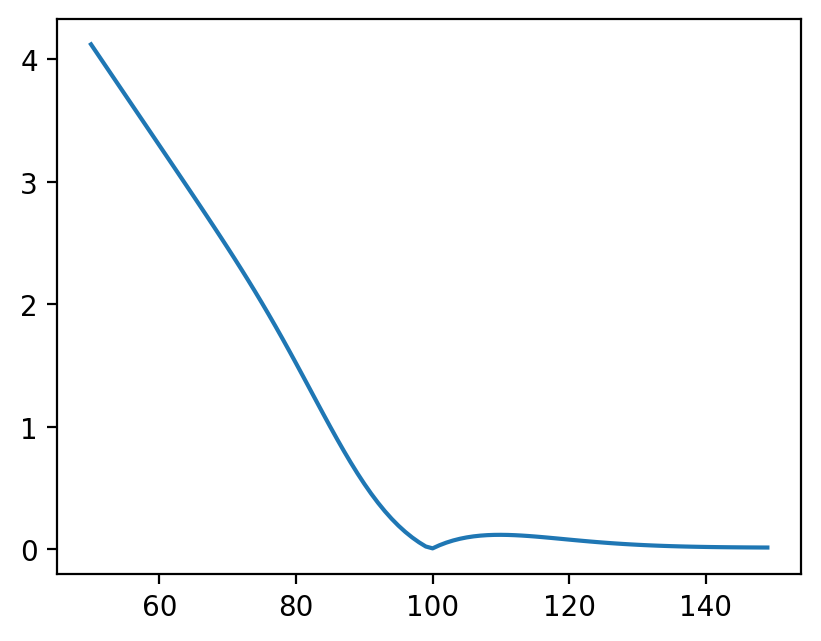

In [55]:
import matplotlib.pyplot as plt
plt.plot(strikes,impl_vol)